In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
from functools import reduce
import statistics
import scipy.stats
import seaborn as sns
import math
import os
import json
import ast
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
pd.options.mode.copy_on_write = True

In [7]:
df=pd.read_csv('csvs/dem_vids_task_excluded.csv')
#df.drop(['Unnamed: 0', 'index'], axis="columns", inplace=True)


<b>Main hypothesis test</b>
<p>Testing whether there are differences in perseverative and regressive errors across block type </p>
<p>Models to run: </p>
<li> 'mean_perseverative_er ~ block_type'
<li> 'mean_regressive_er ~ block_type'

In [10]:
#hypothesis test on perseveration
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'mean_perseverative_er ~ block_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: mean_perseverative_er
No. Observations: 6       Method:             REML                 
No. Groups:       2       Scale:              0.1920               
Min. group size:  3       Log-Likelihood:     -4.2301              
Max. group size:  3       Converged:          Yes                  
Mean group size:  3.0                                              
---------------------------------------------------------------------
                 Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------
Intercept         1.052      0.496    2.120   0.034    0.079    2.025
block_type       -0.214      0.219   -0.978   0.328   -0.644    0.215
Group Var         0.045      0.406                                   



C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\1912717097.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])


In [11]:
#hypothesis test on regressive errors
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'mean_regressive_er ~ block_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: mean_regressive_er
No. Observations: 6       Method:             REML              
No. Groups:       2       Scale:              34.2583           
Min. group size:  3       Log-Likelihood:     -14.3326          
Max. group size:  3       Converged:          Yes               
Mean group size:  3.0                                           
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       4.290      6.322   0.679   0.497   -8.100   16.681
block_type      0.357      2.927   0.122   0.903   -5.379    6.093
Group Var       0.000      3.332                                  



C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\2094840833.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


U:\Documents\envs\reversal_learning_venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\479778254.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\479778254.py:27: UserWarning: set_ticklabel

Text(0.5, 1.0, 'Perseverative errors')

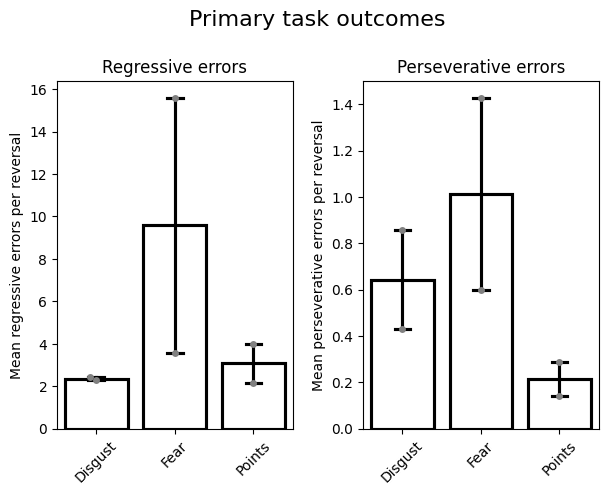

In [14]:
##Example plot
##plot hypothesised results
fig, axes = plt.subplots(1,2, sharey=False)
title="Primary task outcomes"
plt.suptitle(title, fontsize=16)
#fig.set_size_inches(15, 5)
fig.tight_layout(pad=2)
pairs=[('Disgust', 'Fear'), ('Disgust', 'Points'), ('Fear', 'Points')]
order=['Disgust', 'Fear', 'Points']

n_comparisons=1
pvalue_thresholds=[0.0001/n_comparisons, "****"], [0.001/n_comparisons, "***"], [0.01/n_comparisons, "**"], [0.05/n_comparisons, "*"], [1, "ns"]

sns.swarmplot(data=df, x="block_type", y="mean_regressive_er", ax=axes[0], color=".5", size=5, )
sns.barplot(data=df, x="block_type", y="mean_regressive_er", ax=axes[0], errorbar=('ci', 95), fill=False, color="0", capsize=.2)
#axes[0].set_xlabel("Feedback type")
axes[0].set_xlabel("")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel("Mean regressive errors per reversal") 
axes[0].set_title("Regressive errors") 


sns.swarmplot(data=df, x="block_type", y="mean_perseverative_er", ax=axes[1], color=".5", size=5)
sns.barplot(data=df, x="block_type", y="mean_perseverative_er", ax=axes[1], errorbar=('ci', 95), fill=False, color="0", capsize=.2)
#axes[1].set_xlabel("Feedback type")
axes[1].set_xlabel("")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel("Mean perseverative errors per reversal") 
axes[1].set_title("Perseverative errors") 

<b>Adding covariates</b>
<p>Testing whether this result is modified by adding covariates: </p>
<p>First adding demographics and working memory: </p>
<li> 'mean_perseverative_er ~ block_type + age + sex'
<li> 'mean_perseverative_er ~ block_type + age + sex + digit_span'
<li> 'mean_regressive_er ~ block_type + age + sex'
<li> 'mean_regressive_er ~ block_type + age + sex + digit_span'

In [ ]:
#hypothesis test on perseveration
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'perseverative_er ~ block_type+prolific_age+prolific_sex'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

In [ ]:
#hypothesis test on perseveration
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'perseverative_er ~ block_type+prolific_age+prolific_sex+digit_span'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

In [ ]:
#hypothesis test on perseveration
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'regressive_er ~ block_type+prolific_age+prolific_sex'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

In [ ]:
#hypothesis test on perseveration
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'regressive_er ~ block_type+prolific_age+prolific_sex+digit_span'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\4286203301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  to_plot=df.replace(['Male', 'Female'], [0, 1])
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\4286203301.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Male", "Female"])


Text(695.0159143518518, 0.5, '')

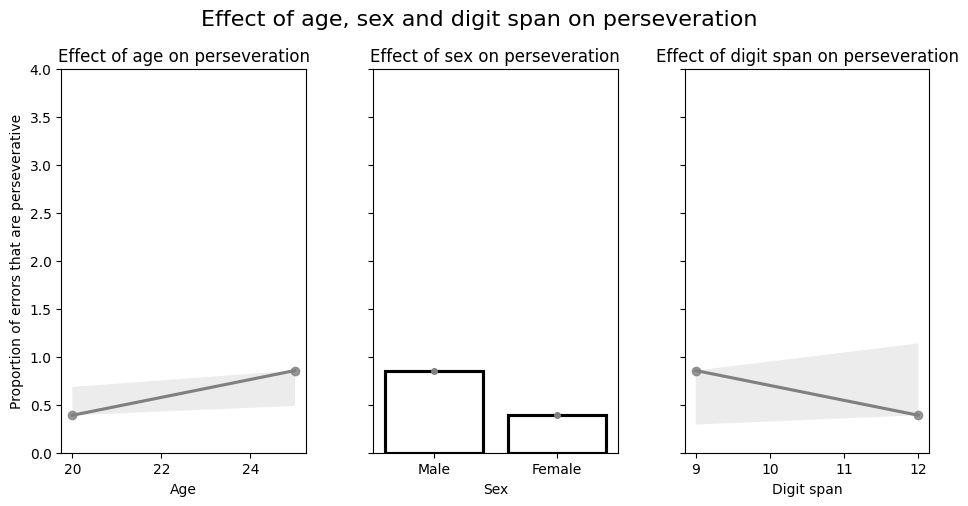

In [16]:
##example plot
to_plot=df.replace(['Male', 'Female'], [0, 1])
to_plot=to_plot.groupby('participant_no')[['mean_perseverative_er', 'lose_shift', 'digit_span', 'prolific_age', 'prolific_sex']].mean()

fig, axes = plt.subplots(1,3, sharey=True)
title="Effect of age, sex and digit span on perseveration"
plt.suptitle(title, fontsize=16)
fig.tight_layout(pad=1.5)
fig.set_size_inches(10, 5)
axes[0].set_ylim([0, 4])

sns.regplot(data=to_plot, x="prolific_age", y="mean_perseverative_er", ax=axes[0], color="0.5")
#r, p= scipy.stats.pearsonr(to_plot["prolific_age"], to_plot["mean_perseverative_er"])
#axes[0].text(21, 0.85, "R={}".format(round(r, ndigits=3)), backgroundcolor="0.7")
#axes[0].text(21, 0.78, "p={}".format(round(p, ndigits=3)), backgroundcolor="0.7")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Proportion of errors that are perseverative") 
axes[0].set_title("Effect of age on perseveration") 

sns.swarmplot(data=to_plot, x="prolific_sex", y="mean_perseverative_er", ax=axes[1], color=".5", size=5, )
sns.barplot(data=to_plot, x="prolific_sex", y="mean_perseverative_er", ax=axes[1], errorbar=('ci', 95), fill=False, color="0", capsize=.2)
axes[1].set_xlabel("Sex")
axes[1].set_title("Effect of sex on perseveration") 
axes[1].set_ylabel("Proportion of errors that are perseverative") 
axes[1].set_xticklabels(["Male", "Female"])
pairs=[(0, 1)]
order=[0, 1]
#annotator = Annotator(axes[1], pairs, data=to_plot, x='prolific_sex', y='mean_perseverative_er', order=order)
#annotator.configure(test='t-test_ind', text_format='star', loc='inside', comparisons_correction="Bonferroni", hide_non_significant=False, pvalue_thresholds=pvalue_thresholds)
#annotator.apply_and_annotate()


to_plot_nonan=to_plot.dropna()
sns.regplot(data=to_plot_nonan, x="digit_span", y="mean_perseverative_er", ax=axes[2], color="0.5")
#r, p= scipy.stats.pearsonr(to_plot_nonan["digit_span"], to_plot_nonan["mean_perseverative_er"])
#axes[2].text(6, 0.85, "R={}".format(round(r, ndigits=3)), backgroundcolor="0.7")
#axes[2].text(6, 0.78, "p={}".format(round(p, ndigits=3)), backgroundcolor="0.7")
axes[2].set_xlabel("Digit span")
axes[2].set_title("Effect of digit span on perseveration") 
axes[2].set_ylabel("") 

<b>Effect of video ratings</b>
<p>Testing whether any differences in perseverative and regressive errors are driven by differences in video ratings (e.g., how disgusting the punishment is or how much habituation occurs) </p>
<p>Models to run: </p>
<li>mean_perseverative_er ~ block_type + prolific_age + prolific_sex + digit_span + d_valence_hab
<li>mean_regressive_er  ~ block_type + prolific_age + prolific_sex + digit_span + d_valence_hab
<br>
<li> mean_perseverative_er~ block_type+prolific_age+prolific_sex + digit_span + d_disgusting_1 (1st disgust rating of chosen stim)
<li> mean_regressive_er~ block_type+prolific_age+prolific_sex + digit_span + d_disgusting_1 (1st disgust rating of chosen stim)

In [ ]:
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'mean_perseverative_er ~ block_type + prolific_age + prolific_sex + digit_span + d_valence_hab'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

In [ ]:
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'mean_regressive_er ~ block_type + prolific_age + prolific_sex + digit_span + d_valence_hab'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

In [ ]:
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'mean_perseverative_er~ block_type+prolific_age+prolific_sex + digit_span + d_disgusting_1'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

In [ ]:
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'mean_regressive_er~ block_type+prolific_age+prolific_sex + digit_span + d_disgusting_1'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

<b>Win-stay/ lose-shift</b>
<p>Testing whether there are differences in perseverative and regressive errors across block type </p>
<p>Models to run: </p>
<li> 'win_stay ~ block_type'
<li> 'lose_shift ~ block_type'
<p>(add any covariates that proved significant in main hypothesis testing? - or add covariates from the offset)</p>

In [20]:
#hypothesis test on lose shift
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'lose_shift ~ block_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: lose_shift
No. Observations: 6       Method:             REML      
No. Groups:       2       Scale:              0.0110    
Min. group size:  3       Log-Likelihood:     1.4834    
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   0.578     0.119  4.857  0.000   0.345   0.811
block_type  0.031     0.052  0.597  0.550  -0.071   0.134
Group Var   0.003     0.099                              



C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\1958908476.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
#hypothesis test on win stay
data=df.reset_index()
data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])
formula = 'win_stay ~ block_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: win_stay
No. Observations: 6       Method:             REML    
No. Groups:       2       Scale:              0.0078  
Min. group size:  3       Log-Likelihood:     1.5209  
Max. group size:  3       Converged:          Yes     
Mean group size:  3.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.817    0.127 6.450 0.000  0.569  1.066
block_type    0.031    0.044 0.695 0.487 -0.056  0.117
Group Var     0.014    0.307                          



C:\Users\eb08\AppData\Local\Temp\ipykernel_9248\4049596247.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(['Disgust', 'Fear', 'Points'], [1.0,2.0,3.0])


<b>Specifying exploratory analyses? - e.g., should I specify that I will check effect on accuracy?<b>